# Predicting League of Legends Wins Based on Game State at 15 Minutes

#### Alec Wang

## Table of Contents
* [Introduction](#Introduction)
    * [Synopsis](#Synopsis)
    * [Roles](#Roles)
    * [Resources](#Resources)
    * [Objectives](#Objectives)
        * [Structures](#Structures)
        * [Epic Monsters](#Epic-Monsters)
* [Motivation](#Motivation)
* [Dataset Sourcing](#Dataset-Sourcing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Surrrender Frequency](#Surrender-Frequency)
    * [Team Winrates](#Team-Winrates)
    * [Gold Difference](#Gold-Difference)
    * [First Blood](#First-Blood)
    * [Voidgrubs](#Voidgrubs)
    * [Examining Correlation Between Kills, Deaths, and Assists](#Examining-Correlation-Between-Kills,-Deaths,-and-Assists)
* [Preprocessing](#Preprocessing)
    * [Transforming Columns](#Transforming-Columns)
    * [Train-test Split](#Train-test-Split)
* [Fitting Models](#Fitting-Models)
    * [Cross-Validation](#Cross-Validation)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    * [Elastic Net Logistic Regression](#Elastic-Net-Logistic-Regression)
    * [Support Vector Machine](#Support-Vector-Machine)
    * [Random Forest](#Random-Forest)
* [Best Models](#Best-Models)
    * [Elastic Net](#Elastic-Net)
    * [SVM](#SVM)

## Introduction

### Synopsis

League of Legends is one of the games of all time. Ten players, grouped into two teams, choose a character from a pool of over 150 champions and battle it out with the goal of destroying the enemy Nexus. In the premier gamemode, players fight on the battlefield known as Summoner's Rift. The map is divided into three lanes --- the top, middle, and bottom lanes --- that are separated by regions known as the Jungle, with the River running perpendicular to them. To reach the Nexus, players must break through turrets and inhibitors with the aid of minions, which will constantly spawn and walk down the lanes. Players can gain gold and experience by killing these minions, which they can use to buy items that will make them stronger and level up their abilities and stats respectively. Throughout the game, neutral objectives ("epic monsters") will spawn in certain locations, and the team that defeats them will gain bonuses and resources that help them destroy turrets and become stronger. The team with more resources is usually stronger and has an easier time killing the enemy players, which in turn will give them even more gold and experience. Matches usually culminate with one team being wiped out, which allows the other team to push into their base and quickly destroy all of their Nexus' defenses. 

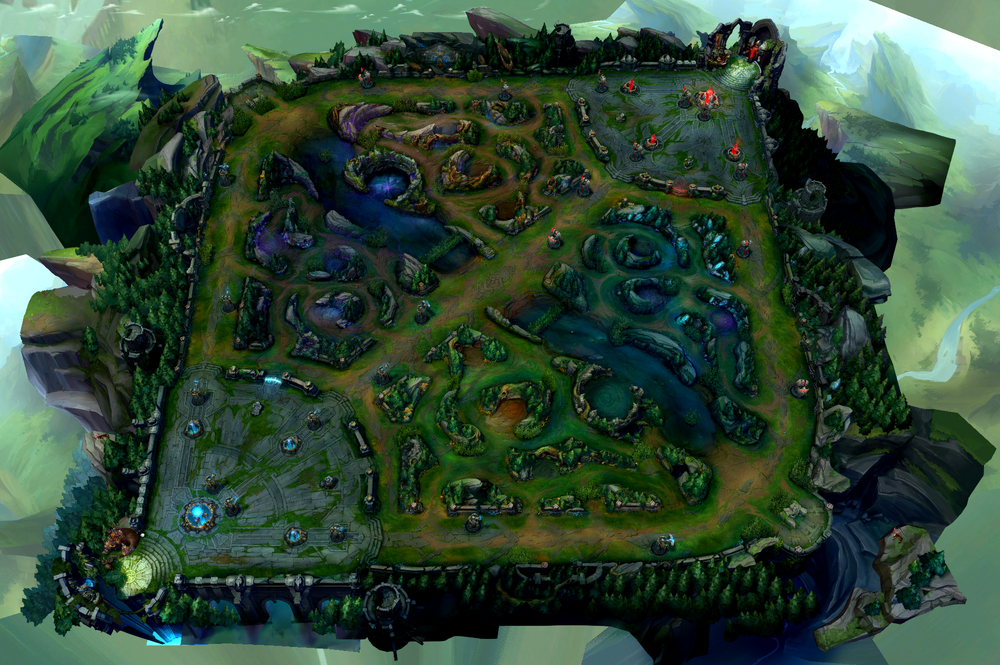

### Roles

In standard play, one player starts the game in the top lane, one starts the game in the jungle, one starts the game in the middle ("mid") lane, and two start the game in the bottom ("bot") lane. Each player has a different role on the team, and the abilities of their champions usually reflect these identities. 

- The **top laner**'s role is usually to act as the frontline in teamfights. The champions played in this lane are usually strong duelists, and in the early stages of the game, they are constantly trading blows and contesting for the minions in their lane. Later, they can either join their team and help them win fights, or use their strong solo capabilities to provide pressure by taking turrets away from where the action is occurring. 

- The jungle player ("**jungler**")'s role is to secure neutral objectives and help the other laners kill their opponents. Jungle champions usually have strong crowd control and/or damaging abilities that allow them to effectively catch and gank ("gang kill") the enemy laners during the early game. Later in the game, the jungler is crucial for fights around neutral objectives because they have the spell "Smite" that deals a large fixed amount of damage to monsters, and the team that gets the last hit on these epic monsters gains their bonuses. 

- The **mid laner**'s role is highly variable and depends on the choice of champion. The champions played here are usually either mages who can provide crowd control and ranged damage, or assassins who can deal extremely high damage to key targets. The mid laner's position at the center of the map allows them to rotate to teamfights happening in the jungle or roam all the way to the top or bottom lanes. Later in the game, they can provide strong utility and/or damage in teamfights and quickly clear out waves of minions using their abilities.

- The **bot laner**'s role is to deal damage. The champions played in this role are usually ranged and have very high damage per second at the cost of having low survivability. Bot laners are usually weak early on and require lots of gold to become strong. Fights in the late game usually revolve around the survival of the bot laner, since if they are left unchecked they will quickly melt the enemy team.

- The **support** goes to the bottom lane along with the bot laner at the start of the game. The support does not take gold from minions in the early game and instead focuses on helping the bot laner survive until they are strong enough to hold their own. Support champions usually provide some combination of crowd control, healing, shielding, buffing, and tanking capabilities. The support's role later in the game is to provide vision in the jungle using wards and help their teammates gain an advantage in fights with their abilities.

### Resources

There are two main types of resources in League of Legends: gold and experience. Gold is obtained passively at a slow rate as well as by scoring the last hit on enemy minions, killing monsters in the jungle, destroying structures, slaying epic monsters, and defeating enemy champions in combat. Experience is gained in mostly similar ways --- by being in the vicinity of dying minions, killing jungle monsters, defeating epic monsters, and killing enemies.

- **Gold** is used to purchase items from the shop. Items give stats and bonuses to champions that give them an edge in combat. In any given fight, the team with more gold, and hence more items, is more likely to win, but there are a multitude of other factors that make having a gold advantage not a foolproof condition for victory. The support is able to purchase a special item that allows them to gain gold without stealing minions from their bot laner.

- **Experience** is used to level up. Champions begin at level 1, and they can reach a maximum of level 18. Each level grants an amount of baseline stats as well as a skill point. Skill points can be used to level up each of the champion's four abilities, which generally increases their damage, makes their crowd control stronger, and/or reduces their cooldowns.

### Objectives

There are two types of objectives on Summoner's Rift: structures and neutral objectives. Securing objectives usually grants gold and bonuses that make the securing team stronger, helping them to win teamfights.

#### Structures

Each team has three types of structures that can be broken by the enemies: Turrets, inhibitors, and the Nexus. Breaking each of these grants gold, and breaking the Nexus wins the game for the destructor's team.

- **Turrets** are durable structures that deal powerful single-target damage. They are the primary defensive lines for each team's base. Each team has three turrets on each lane and two that directly guard the Nexus for a total of 11 turrets. For the first 14 minutes of the game, the outermost turrets on each lane are guarded by five "platings", which reduce the amount of damage they take but also grant bonus gold to the players that break them.

- **Inhibitors** are structures located behind the lane turrets that can only be damaged once all three of their protecting turrets are destroyed. Destroying the enemy inhibitor allows allied "super minions" to spawn in that lane, which are extremely durable and are a threat if left unchecked. The turrets guarding the nexus can only be damaged if at least one inhibitor is broken.

- Breaking the **Nexus** is the primary objective of the game. A game can only end if one team's Nexus is broken or one team surrenders. The Nexus can only be damaged once both of its guarding turrets are destroyed.

#### Epic Monsters

There are several types of epic monsters that can spawn at set locations in the River. These monsters are neutral objectives, and they confer bonuses to the team that scores the killing blow on them.

- The **Void Grubs** are a trio of monsters that spawn in the pit on the top side of the River (the "Baron pit"). They can spawn up to twice before 14 minutes in the game, depending on if they are killed or not, for a maximum of six voidgrubs. For each voidgrub defeated, the team that scored the last blow will get a bonus to their structure damage. If one team kills at least five voidgrubs, they will be able to spawn mini voidgrubs that contribute even further to their structure damage.

- The **Dragon** is a durable monster that spawns in the pit on the bottom side of the River (the "Dragon pit"). The first Dragon will spawn five minutes into the game, and a new one will spawn 5 minutes after the previous one is killed. There are six types of Dragons, and each of them grants a different bonus to the team that slays it. If one team slays four dragons, they gain a powerful buff known as the Dragon Soul. There are six types of Dragon Souls that correspond to the different types of dragons, and the type that is given is determined randomly at the start of each game. Killing the second dragon of the game will also change the terrain of Summoner's Rift slightly based on the type of Dragon Soul that will be given out. Once one team obtains the Dragon Soul, the subsequent Dragons that spawn will be Elder Dragons, with an increased respawn time of six minutes.

- The **Rift Herald** is a monster that spawns in the Baron pit. One Herald will spawn each game at 14 minutes, before departing at 20 minutes to make way for Baron Nashor to spawn. The team that scores the killing blow on the Rift Herald will gain the Eye of the Herald, which allows them to spawn the Rift Herald anywhere on the map. Players can ride the Herald and guide it to charge into Structures, dealing a massive amount of damage.

- **Baron Nashor** is a powerful, eldritch monster that spawns in the pit named after it. The first Baron spawns at 20 minutes, and a new one will spawn six minutes after the previous one is killed. The team that lands the killing blow on the Baron will gain a large amount of gold and experience, and are also given the Hand of Baron buff for 180 seconds. Hand of Baron grants players increased combat stats and allows them to empower nearby minions to be more durable and damaging, allowing them to damage structures much more effectively.

- The **Elder Dragon** is a stronger version of the Dragon that spawns in the Dragon pit once one of the teams has obtained the Dragon Soul. Slaying the Elder Dragon grants the Aspect of the Dragon to the killing team for 150 seconds, which lets attacks burn enemy champions and execute them immediately if they fall below a certain percentage of their health. The team that obtains the Aspect of the Dragon gives a monumental advantage in a fight, and games are frequently determined by the fight surrounding or following this objective.

The Baron Nashor and Elder Dragon do not spawn before the 15 minute mark, so they are not relevant to this analysis.

## Motivation

League of Legends' primary competitive gamemode is 5v5 Ranked Solo/Duo ("solo queue") on Summoner's Rift. In Ranked, players are grouped by tier and division. Winning games grants a player League Points (LP), and losing games deducts LP. Players advance divisions within a tier upon reaching 100 LP, and they advance to the lowest division of the next tier if they are in the highest division of their tier. Iron, Bronze, Silver, Gold, Platinum, Emerald, and Diamond are each divided into four divisions with IV being the lowest and I being the highest, while Master, Grandmaster, and Challenger, the "apex tiers", function differently, essentially sharing only one division with an uncapped amount of LP with rank being determined by the player's position in the LP leaderboard.

In League of Legends, there is a culture around **surrendering** early because a game appears "unwinnable". Unless a player goes AFK (away from keyboard) or ragequits in the first few minutes of the game, the earliest a team can begin a vote to surrender is at the 15 minute mark. A surrender vote will go through if four of the five players on the team agree to forfeit. Many players are quick to give up and want to surrender, but oftentimes the situation is not doomed and the game can still be won if played out longer. The aim of this analysis is to predict which team will win based on the state of the game at 15 minutes. In other words, we want to have a framework for determining, based on the statistics of the game at 15 minutes, if a game is truly lost or not.

## Dataset Sourcing

Using the official Riot Games API (https://developer.riotgames.com/apis), I fetched data from 3199 matches of solo queue ranging from players in Iron IV to Diamond I. I would query the first 10 pages of players given by the API for each division (the way the players are sorted in the pages is unknown to me, but I assumed that they are fairly random), and take data from several of their most recent matches played. Each observation records the state of the game that could have been observed at the 15 minute mark, as well as the actual outcome of the game. Detailed information on the variables can be found in the codebook.

## Exploratory Data Analysis

There are various trends in the data we can investigate that may hint towards the more significant predictors of victory. However, it is also interesting to just visualize the distributions of some statistics.

Using pandas, we will load the csv as a pandas dataframe structure.

In [1]:
import pandas as pd
ranked = pd.read_csv('ranked15.csv')
ranked

,gameDuration,surrendered,win,blueTopSummonerId,blueTopChampionName,firstBloodTeam,blueJungleSummonerId,blueJungleChampionName,blueMiddleSummonerId,blueMiddleChampionName,...,redJungleLevel15,redMiddleGold15,redMiddleLevel15,redBottomGold15,redBottomLevel15,redUtilityGold15,redUtilityLevel15,goldDifference15,rank,division
0,1926,No,Blue,iFU4aBrUreshJ8DxLmHaP_Jwe05erx3_4lZFFkf99d-eiU...,Renekton,blue,FKG4gvUgybI19SpvE7D0uCIJ9dU1upgC1Cn_5_riQgpgEP...,Graves,o-btHJWJF43J3YotAG1WzC-YcTTVpG_zVbn2gyqE7r7Gf0...,Orianna,...,10,4906,10,5890,8,4241,8,-1099,DIAMOND,I
1,1543,No,Red,9_dhT6LdeJEUaS79GyI2PvK06ykSd9x8PoPLGfw43pBjqH...,Jax,blue,u9PAA02O3ZCQqWoYI1UzTfwpk83HP6dG2qThVsJEZkGW5A...,Zac,oW7ClkG_Dm821o5V8sp9NAimbYUfEERfDxELcLICsqeaCO...,Yone,...,10,6064,10,5807,9,3723,7,-3544,DIAMOND,I
2,2363,No,Red,rt0NvtKm4MjkjrUVeDGD3qIZ4S5ul1udnnMdklCWz73S-L...,Nasus,red,m6SjfEegF0eatK-UkcxUObRWjNjMkI0DsxjDPgxYX5yXef...,Nidalee,BIigWhFFDq5LaxE7oJAk6hwbbquaPCJzXUMXm1jMTEEpme...,Neeko,...,9,5287,11,6284,8,5042,7,1084,DIAMOND,I
3,1020,Yes,Blue,tyjn2mt1h8Q-E8hZ3XCHT7YHQh9dtv3DxUo-NNJcPtzrtC...,Sion,red,oFYei7RCRfzokXU34gkCnE0PHHc67jQULveNIY3YdAnZXY...,Brand,qxP0NpSFLpgGnIl4x0brKTRcdbiMJf2cDIaYn_aUrkIAX6...,Talon,...,10,5218,10,6012,9,3678,7,3691,DIAMOND,I
4,1853,Yes,Blue,_goBGjH2Q8HvQ23aeTegIilBFT7Rsx1QIU13T8qzYPMxRg...,Irelia,blue,4kuaNdx0Xmz66Jo3Zz216EhKQT5nUW9tHStv3YgXov2kCZ...,Ekko,BaCAT_tdz5zhKiXywafHAVSNjvz781bXnGSwSk5xwiF5Ob...,Zed,...,8,5907,11,7192,8,4564,8,2449,DIAMOND,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,915,Yes,Red,RZvAIG6OWxTkFocRaHiH7TRG4SG0ssLBO_0fZV3w-OUeU1...,Lillia,red,9wXPTEPTPhD8V1kkyXpkMqodcbAAg5jKjtBdUVtUrSWnia...,Warwick,6WefdFo4Jnu4ZCazd5Bpe138YRdehvE24P4kj_KRLsUXL-...,Xerath,...,10,3153,8,7693,9,6265,9,-9700,IRON,IV
3186,1148,No,Red,R-M1cpQGYpxbl8kQNhZIcGUPcgulOvOdeawle1s5S5qjAx...,Garen,red,oPgXZha_0fzIfX97sW1EuA9NEjwhfTItwQtuUFFVqDwJq1...,Nunu,sW8FXd1Hd19bb3CJtsktgIVGQVRDQKvIMPeKRjsdHjNeAh...,Kennen,...,8,5809,11,6040,9,4300,8,-9486,IRON,IV
3187,1329,No,Red,294gvqyCsfyNLuOiqgWhrYs92Le_1-p34iLsofbQZm1z7Q...,Darius,red,zPOE79qC65BRlGDLhJHt2V3KX3C4PhW_Z_B2dHmrNOF98L...,MasterYi,BSzOnb_wabdDWzCRnRU_bvO9tf71pqfotzU4ESMHHRbSXX...,TwistedFate,...,8,5798,11,6954,8,4447,7,-5324,IRON,IV
3188,1549,No,Blue,zYla5Okq2jGd0dYXm1Xme2ueGjeDEmUajJt3_GgL5XwGwq...,Shen,blue,OoJum7SxYVuNTrczR6G3AsMsR3Nb2LO8YwMsW08v1mZRlb...,Gwen,XIz-XUaBAUmur5KbuOiFEX9RR6-ILXRqT4A1wLg-ydPo1W...,Akshan,...,9,4120,8,5758,9,4088,8,4088,IRON,IV


### Surrender Frequency

Even just based off on the preview of the dataset, we can notice that a significant amount of games ended in surrender. We can visualize the proportion of games that were surrendered:

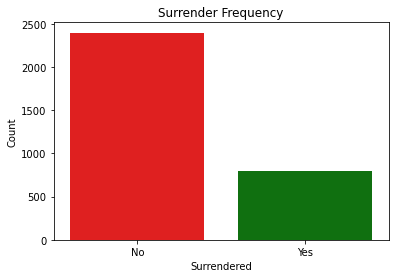

In [455]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.countplot(x="surrendered", data=ranked, palette={'No': 'red', 'Yes': 'green'})
plt.title("Surrender Frequency")
plt.xlabel("Surrendered")
plt.ylabel("Count")
plt.show()

The goal of this analysis is to predict which team will win based on the state of the game at 15 minutes. Since we want the outcome of the game to be a function of the in-game performances of the players (and not whether or not they wanted to forfeit), we should remove the games that were surrendered prematurely. In the later stages of the game, players take a very long time to respawn. It is common for teams to surrender right after getting wiped out in a major fight while the enemy is in the process of trudging straight for the Nexus, which would have resulted in a loss very shortly after anyways. In these situations, it does not matter if the losing team surrenders or not, because the outcome would have already been guaranteed. To try to account for these cases as much as possible, we will only remove games that were surrendered before the arbitrary time of 35 minutes. 

In [4]:
ranked_filtered = ranked.drop(ranked[(ranked.surrendered == "Yes") & (ranked.gameDuration < 35*60)].index)
ranked_filtered

,gameDuration,surrendered,win,blueTopSummonerId,blueTopChampionName,firstBloodTeam,blueJungleSummonerId,blueJungleChampionName,blueMiddleSummonerId,blueMiddleChampionName,...,redJungleLevel15,redMiddleGold15,redMiddleLevel15,redBottomGold15,redBottomLevel15,redUtilityGold15,redUtilityLevel15,goldDifference15,rank,division
0,1926,No,Blue,iFU4aBrUreshJ8DxLmHaP_Jwe05erx3_4lZFFkf99d-eiU...,Renekton,blue,FKG4gvUgybI19SpvE7D0uCIJ9dU1upgC1Cn_5_riQgpgEP...,Graves,o-btHJWJF43J3YotAG1WzC-YcTTVpG_zVbn2gyqE7r7Gf0...,Orianna,...,10,4906,10,5890,8,4241,8,-1099,DIAMOND,I
1,1543,No,Red,9_dhT6LdeJEUaS79GyI2PvK06ykSd9x8PoPLGfw43pBjqH...,Jax,blue,u9PAA02O3ZCQqWoYI1UzTfwpk83HP6dG2qThVsJEZkGW5A...,Zac,oW7ClkG_Dm821o5V8sp9NAimbYUfEERfDxELcLICsqeaCO...,Yone,...,10,6064,10,5807,9,3723,7,-3544,DIAMOND,I
2,2363,No,Red,rt0NvtKm4MjkjrUVeDGD3qIZ4S5ul1udnnMdklCWz73S-L...,Nasus,red,m6SjfEegF0eatK-UkcxUObRWjNjMkI0DsxjDPgxYX5yXef...,Nidalee,BIigWhFFDq5LaxE7oJAk6hwbbquaPCJzXUMXm1jMTEEpme...,Neeko,...,9,5287,11,6284,8,5042,7,1084,DIAMOND,I
5,1859,No,Red,0nRR0V_DTXwA0e2-TgTgyxZWlO_U2iNpDq2zVh2EgaGIlk...,Fiora,red,AFlHFEDdOGj26RqEZCh9-MY7OME2svaOzWXWoZ_hz8vU-9...,Viego,lhnmHTDQmI5nSFZxLeppTMaqO5EHpnMzO5_kHemQpDbQ0k...,Sion,...,9,6441,10,7207,10,5034,8,-2789,DIAMOND,I
6,2073,No,Blue,4gt5ZuASaItJHitJ2z4QiXcVwzCvNDsD7P8ENHeYiGPiGJ...,KSante,red,4P8Lh1fkPxiLCcMmphMUmluB5uv57CuJqWJbD0j2jIwxbY...,Belveth,McRyOylCzcdxMhOUoEMwSPSK31wiNtS8XzSfwCnKDO1J3X...,Hwei,...,9,5551,10,5893,8,3908,8,1332,DIAMOND,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183,1450,No,Red,LQmSwJIC7fzNEWyhSeuLF_SGWDuahMALVZ7v5_OXYNUzml...,Jax,red,-V0LoA-MYW8WqQFMOSMPAS4zQvmGOVYfAIRWu4D_Un2u-o...,Warwick,3TNTCFqPtYNjo-u18SPjI8z2hhqvpCPBXloai_bVXjLY-R...,Malzahar,...,10,4799,9,4136,8,3949,7,-541,IRON,IV
3184,3009,No,Blue,dOq2V6NqY0vxVJnvcmmbU0_h8Eg7gSzH3FcD-t8Jj9rg-c...,Caitlyn,blue,d66vdxxPCSJV9bvuGTKzg7jQWAG9eZqOYabK5_dkyIAiCq...,Vi,JnVtDzOXbXPtFOcl8R3RyDl6bpwyOCGcouefOKJE_6msRn...,Katarina,...,8,4023,9,6097,9,4369,7,-1384,IRON,IV
3186,1148,No,Red,R-M1cpQGYpxbl8kQNhZIcGUPcgulOvOdeawle1s5S5qjAx...,Garen,red,oPgXZha_0fzIfX97sW1EuA9NEjwhfTItwQtuUFFVqDwJq1...,Nunu,sW8FXd1Hd19bb3CJtsktgIVGQVRDQKvIMPeKRjsdHjNeAh...,Kennen,...,8,5809,11,6040,9,4300,8,-9486,IRON,IV
3187,1329,No,Red,294gvqyCsfyNLuOiqgWhrYs92Le_1-p34iLsofbQZm1z7Q...,Darius,red,zPOE79qC65BRlGDLhJHt2V3KX3C4PhW_Z_B2dHmrNOF98L...,MasterYi,BSzOnb_wabdDWzCRnRU_bvO9tf71pqfotzU4ESMHHRbSXX...,TwistedFate,...,8,5798,11,6954,8,4447,7,-5324,IRON,IV


We are left with data from 2470 games. Due to the nature of how I retrieved the data, there are no missing values in the dataset, so we will not check for missingness.

### Team Winrates

Intuitively, we should expect an equal win percentage for both the blue (lower left) and red (upper right) teams. However, historically, the blue side has always had a slightly higher winrate.

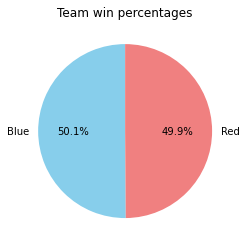

In [5]:
win_counts = ranked_filtered["win"].value_counts()
plt.pie(win_counts, labels=['Blue', 'Red'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Team win percentages")
plt.show()

As expected, the winrate slightly favors the blue team. This discrepancy is generally explained by the asymmetry of Summoner's Rift. Most notably, the Dragon pit is closer to the blue side while the Baron pit is closer to the red side. There are also several slight differences in terrain between opposite sides of the map. Additionally, since the player views the game from an isometric angle rather than directly from the top down, there can be a difference in how they perceive the information on their screen based on which team they are on. A combination of these factors has consistently given an advantage to the blue side, and this sample is no exception.

### Gold Difference

It is generally accepted that the most significant predictor of game outcome is the difference between the total amounts of gold each team has acquired. The team that wins more fights and objectives gains more gold and becomes stronger, which in turn allows them to achieve these victories even more easily. This snowball effect is why it is often very difficult to come back from a gold deficit. The goldDifference15 variable is calculated by the total amount of gold the blue team has at 15 minutes subtracted by the total amount of gold the red team has at 15 minutes. Positive values represent an advantage for the blue team, and negative values represent an advantage for the red team. We can visualize the relationship between gold difference and winning team using side-by-side boxplots:

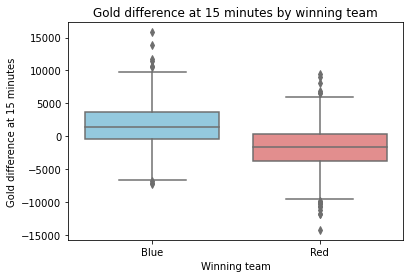

In [454]:
sns.boxplot(x="win", y="goldDifference15", data=ranked_filtered, palette={'Blue': 'skyblue', 'Red': 'lightcoral'})
plt.title("Gold difference at 15 minutes by winning team")
plt.xlabel("Winning team")
plt.ylabel("Gold difference at 15 minutes")
plt.show()

As demonstrated by the boxplot, the team that ends up winning the game most often already has a gold advantage at the 15 minute mark. However, it is important to note that there are still a significant portion of games where the team that was behind at 15 minutes eventually won the game. In the case of the most extreme outlier, we can see that the red team came back from a 10,000 gold deficit at 15 minutes. This is a monumentally large deficit to be in so early into the game, and it is incredibly impressive that the players on the team were able to demonstrate the resilience to not give up.

However, it is important to note that the gold difference between teams is not visible in game. Players can only estimate the difference in the teams' wealth by analyzing the game state. As such, we will not be using the numeric gold differences as a predictor.

### First Blood

The team that gets draws the first blood (gets the first kill) gets a bit of extra gold for the player that scored the kill as well as a morale boost. Historically, this has always translated to a higher winrate for the team that obtains first blood. 

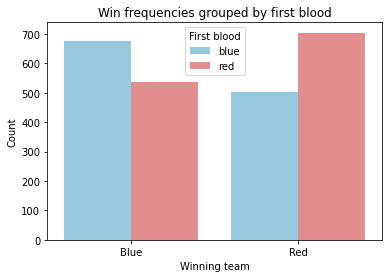

In [453]:
sns.countplot(x="win", hue="firstBloodTeam", data=ranked_filtered, palette={'blue': 'skyblue', 'red': 'lightcoral'})
plt.title("Win frequencies grouped by first blood")
plt.xlabel("Winning team")
plt.ylabel("Count")
plt.legend(title="First blood")
plt.show()

As expected, we can see that the team that draws first blood has a noticably higher winrate.

### Voidgrubs

We can examine the relationship between all of the neutral objectives and win probability, but since the Voidgrubs are the newest addition to the game, they are the most interesting one to investigate. It is possible for a team to have killed up to 6 voidgrubs by the 15 minute mark.

We will calculate the difference between the number of voidgrubs each team has killed and visualize the distribution of that value against the winning team.

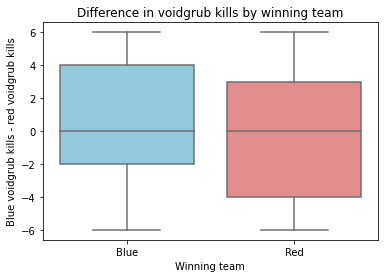

In [450]:
sns.boxplot(x=ranked_filtered["win"], y=ranked_filtered["blueGrubKills15"] - ranked_filtered["redGrubKills15"], palette={'Blue': 'skyblue', 'Red': 'lightcoral'})
plt.title("Difference in voidgrub kills by winning team")
plt.xlabel("Winning team")
plt.ylabel("Blue voidgrub kills - red voidgrub kills")
plt.show()

There is a slight trend that suggests that the team with more voidgrubs wins more frequently.

### Examining Correlation Between Kills, Deaths, and Assists

With the exception of players dying to towers or monsters without enemy intervention, each death corresponds to a kill for someone on the opposite team. Therefore, it is expected that the values of kills and deaths should be strongly correlated. Assists are not granted on a 1 to 1 basis; up to four players can get an assist for a kill if the entire team contributes towards it. We should still expect a positive correlation between kills and assists. The values should be more strongly correlated within lanes (i.e. blue top kills to red top deaths) since in the first 15 minutes of the game most kills happen on the opposing laner. The jungler is the exception, since they usually get their kills from ganking enemy laners rather than the enemy jungler.

We will try to visualize these correlations by first examining the correlation heatmap between both toplaners' kills, deaths, and assists, as well as the heatmap between both junglers' kills, deaths, and assists.

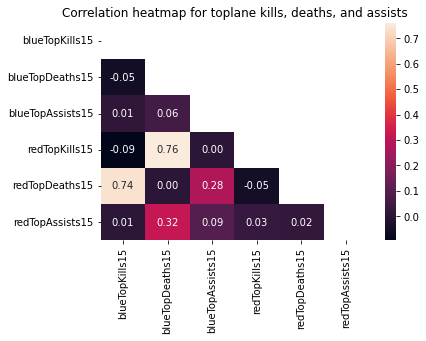

In [60]:
top_corr = ranked_filtered[["blueTopKills15", "blueTopDeaths15", "blueTopAssists15", "redTopKills15", "redTopDeaths15", "redTopAssists15"]].corr()
mask = np.triu(top_corr)
sns.heatmap(top_corr, mask=mask, annot=True, fmt=".2f")
plt.title("Correlation heatmap for toplane kills, deaths, and assists")
plt.show()

As expected, we observe a strong correlation between the blue toplaner's kills and red toplaner's deaths, and vice versa. We also see a weaker, but nonetheless present correlation between one toplaner's assists and the other toplaner's deaths.

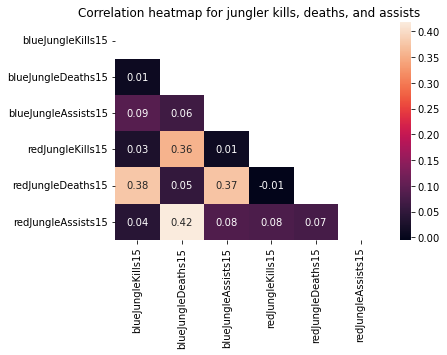

In [61]:
jungle_corr = ranked_filtered[["blueJungleKills15", "blueJungleDeaths15", "blueJungleAssists15", "redJungleKills15", "redJungleDeaths15", "redJungleAssists15"]].corr()
mask = np.triu(jungle_corr)
sns.heatmap(jungle_corr, mask=mask, annot=True, fmt=".2f")
plt.title("Correlation heatmap for jungler kills, deaths, and assists")
plt.show()

The results for the jungler show a weaker correlation between one jungler's kills and the enemy jungler's deaths. However, the correlation is still present, since oftentimes junglers will "invade" the enemy jungle to steal their monsters, which can often end up in confrontations. Additionally, when one jungler ganks, oftentimes the other jungler will be nearby to counter the gank, leading to more jungler-jungler interaction. These counter ganks in particular might explain the relatively strong correlation between assists on one jungler and deaths on the other, since the laners often get the kills in these situations.

I will choose to not do anything about these correlations since they appear to be largely pairwise, and should therefore be dealt with by feature selection methods in the models themselves.

## Preprocessing

### Transforming Columns

Currently, our dataset has 93 columns, although not all of them are relevant as predictors. For example, the player IDs do not matter, and we will not be considering the names of the champions. In addition to filtering out unused predictors, we can also express some quantities as a difference between the two teams without losing too much information. We will be creating new columns to represent the differences between the numbers of epic monsters slain. We can also do this to represent the level differences between opposing players of the same roles.

In [73]:
ranked_transformed = ranked_filtered.copy()

ranked_transformed["hextechDifference15"] = ranked_transformed["blueHextechDragonKills15"] - ranked_transformed["redHextechDragonKills15"]
ranked_transformed["infernalDifference15"] = ranked_transformed["blueInfernalDragonKills15"] - ranked_transformed["redInfernalDragonKills15"]
ranked_transformed["oceanDifference15"] = ranked_transformed["blueOceanDragonKills15"] - ranked_transformed["redOceanDragonKills15"]
ranked_transformed["mountainDifference15"] = ranked_transformed["blueMountainDragonKills15"] - ranked_transformed["redMountainDragonKills15"]
ranked_transformed["cloudDifference15"] = ranked_transformed["blueCloudDragonKills15"] - ranked_transformed["redCloudDragonKills15"]
ranked_transformed["chemtechDifference15"] = ranked_transformed["blueChemtechDragonKills15"] - ranked_transformed["redChemtechDragonKills15"]

ranked_transformed["grubDifference15"] = ranked_transformed["blueGrubKills15"] - ranked_transformed["redGrubKills15"]
ranked_transformed["heraldDifference15"] = ranked_transformed["blueHeraldKills15"] - ranked_transformed["redHeraldKills15"]

ranked_transformed["topLevelDifference15"] = ranked_transformed["blueTopLevel15"] - ranked_transformed["redTopLevel15"]
ranked_transformed["middleLevelDifference15"] = ranked_transformed["blueMiddleLevel15"] - ranked_transformed["redMiddleLevel15"]
ranked_transformed["jungleLevelDifference15"] = ranked_transformed["blueJungleLevel15"] - ranked_transformed["redJungleLevel15"]
ranked_transformed["bottomLevelDifference15"] = ranked_transformed["blueBottomLevel15"] - ranked_transformed["redBottomLevel15"]
ranked_transformed["utilityLevelDifference15"] = ranked_transformed["blueUtilityLevel15"] - ranked_transformed["redUtilityLevel15"]

To prepare our data for model fitting, we will select a subset of columns to use as predictors. We will include the first blood team, level differences for each role at 15 minutes, epic monster differences at 15 minutes, and all of the kills, deaths, and assists of each player.

In [82]:
# Remove game duration, surrendered, rank, division, overall gold difference
# Rank and division will not be used due to a lack of precision in the way the statistic was retrieved
ranked_dropped = ranked_transformed.drop(columns=["gameDuration", "surrendered", "rank", "division", "goldDifference15"])
for team in ["blue", "red"]:
    # Removing champion names, summoner IDs, actual champion levels, and gold differences
    for role in ["Top", "Jungle", "Middle", "Bottom", "Utility"]:
        ranked_dropped = ranked_dropped.drop(columns=["{}{}ChampionName".format(team, role), "{}{}SummonerId".format(team, role), "{}{}Gold15".format(team, role), "{}{}Level15".format(team, role)])
    # Removing actual kills on epic monsters (in favor of the differences calculated above)
    for dragon in ["Infernal", "Ocean", "Mountain", "Cloud", "Hextech", "Chemtech"]:
        ranked_dropped = ranked_dropped.drop(columns=["{}{}DragonKills15".format(team, dragon)])
    ranked_dropped = ranked_dropped.drop(columns=["{}HeraldKills15".format(team), "{}GrubKills15".format(team)])

ranked_dropped.head()

,win,firstBloodTeam,blueTopKills15,blueTopDeaths15,blueTopAssists15,blueJungleKills15,blueJungleDeaths15,blueJungleAssists15,blueMiddleKills15,blueMiddleDeaths15,...,mountainDifference15,cloudDifference15,chemtechDifference15,grubDifference15,heraldDifference15,topLevelDifference15,middleLevelDifference15,jungleLevelDifference15,bottomLevelDifference15,utilityLevelDifference15
0,Blue,blue,1,4,1,4,3,2,2,1,...,0,1,0,1,0,-1,2,-1,0,-1
1,Red,blue,1,5,1,1,1,1,3,3,...,0,0,0,-6,0,-2,0,-2,1,0
2,Red,red,1,0,1,2,1,5,0,1,...,-1,0,0,6,-1,1,-1,0,1,0
5,Red,red,1,2,0,1,1,0,0,6,...,0,0,0,0,0,0,1,0,-1,-1
6,Blue,red,3,1,0,0,3,1,0,2,...,0,0,0,0,0,2,1,0,0,0


Our finalized dataframe has 45 columns, one of which is the outcome. We will split this one last time into an X and y dataframe.

In [83]:
X = ranked_dropped.drop(columns=["win"])
y = ranked_dropped["win"]

### Train-test Split

To fit our models and evaluate their performance, we need to partition our dataset into a training set and a testing set. Our models will be fit to the training set, and they will be evaluated on the testing set afterwards. The idea is that if the testing set and training set come from the same population and have the same distribution, then our models will perform well on the the testing set even if they have never seen it before.

We will perform a train-test split with a proportion of 80%/20%, stratified for the outcome variable "win". This will ensure that both levels of the outcome are properly represented in both our train and test sets.

In [84]:
from sklearn.model_selection import train_test_split

# random_state=123 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2, stratify=y)
X_train.head()

,firstBloodTeam,blueTopKills15,blueTopDeaths15,blueTopAssists15,blueJungleKills15,blueJungleDeaths15,blueJungleAssists15,blueMiddleKills15,blueMiddleDeaths15,blueMiddleAssists15,...,mountainDifference15,cloudDifference15,chemtechDifference15,grubDifference15,heraldDifference15,topLevelDifference15,middleLevelDifference15,jungleLevelDifference15,bottomLevelDifference15,utilityLevelDifference15
1004,blue,2,2,3,7,4,6,5,5,3,...,0,0,0,0,0,-1,0,0,1,0
1405,blue,4,2,2,2,3,4,1,2,1,...,0,1,-1,2,1,0,0,0,2,1
1563,red,1,2,1,4,2,0,0,2,6,...,-1,0,0,-2,0,-1,0,1,0,1
2942,red,0,5,0,2,2,1,5,3,0,...,0,0,1,-4,0,-1,1,-1,-1,1
1260,blue,1,2,1,2,1,1,1,0,2,...,1,0,0,-6,0,0,0,0,1,1


We will create an sklearn Pipeline class for each model we will be fitting. Cross-validation will be performed at the beginning of each Pipeline using the same random_state to ensure equivalent folds.

## Fitting Models

### Cross-Validation

All of the models we will be fitting contain hyperparameters, values that are up to the data scientist to change that affect the training of the model. We want to be able to evaluate the performance of different combinations of hyperparameters by estimating the accuracy they will achieve on our testing set. However, fitting the model to the entire training set and evaluating its accuracy on the training set is not a good way to estimate the accuracy on the testing set, data which it has never seen before.

To overcome this issue, we will use K-fold cross validation. K-fold cross validation involves partitioning the data into K "folds". Using this configuration, we can fit a model K times, each time with a different individual fold as a pseudo-testing set and the other K - 1 folds as a training set. Each time, we will record the accuracy on the pseudo-test set. The average of the K different accuracy scores is a much better estimate of the accuracy we will achieve on the actual test set.

We will iterate through many combinations of hyperparameters and fit models with them onto our K folds, using the resulting averaged accuracy scores as a metric for their performance. This will allow us to determine an optimal combination of hyperparameters for each of our models.

In [456]:
cv = KFold(n_splits=10, shuffle=True, random_state=231) # K-Fold cross validation folds

### K-Nearest Neighbors

The first model we will fit is a K-Nearest Neighbors classifier. The model is simple --- to predict the outcome for an observation, the outcomes of the K nearest observations in the space of predictor variables are checked, and the most common outcome out of those K observations will be assigned to our new observation. Since winning gamestates tend to share lots of characteristics, this model is a good start to the analysis and should be reasonably effective. The collinearity between kills and deaths could potentially cause issues, however.

In [307]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

numeric_columns = list(X_train.select_dtypes('number'))
categorical_columns = list(X_train.select_dtypes('object'))

preprocessor = ColumnTransformer([
        ('numeric', StandardScaler(), numeric_columns), # scale numeric columns
        ('categorical', OneHotEncoder(), categorical_columns) # one-hot encode categorical columns
    ])

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': range(1, 100) # Try values of k from 1 to 99
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=cv, scoring='accuracy', verbose=1)
knn_grid_search.fit(X_train, y_train)

print("Best parameters:", knn_grid_search.best_params_)
print("Best accuracy estimate:", knn_grid_search.best_score_)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Best parameters: {'knn__n_neighbors': 47}
Best accuracy estimate: 0.6760652207352715


The K-Nearest Neighbors model performed fairly, achieving a 67.61% estimated test accuracy using the optimal value of k = 47. The estimate of accuracy with respect to k is shown below:

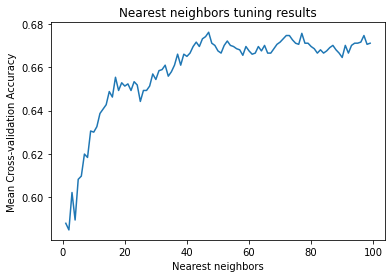

In [241]:
results = knn_grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

k_values = [param['knn__n_neighbors'] for param in params]
plt.plot(k_values, mean_test_scores)
plt.xlabel("Nearest neighbors")
plt.ylabel("Mean Cross-validation Accuracy")
plt.title("Nearest neighbors tuning results")
plt.show()

### Elastic Net Logistic Regression

The next model we will fit is an elastic net logistic regression. Logistic regression is a model that predicts the log-odds of an outcome event occurring (i.e. the blue team winning) as a linear combination of predictors. The elastic net version will allow us to regularize the model, reducing the impacts of insignificant predictors.

In [247]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

en_pipeline = Pipeline([
    ('preprocessor', preprocessor), # same preprocessing steps as before
    ('en', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000))
])

en_param_grid = {
    'en__C': [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6],
    'en__l1_ratio': np.arange(0, 1, 0.1)
}

# Use same cv folds generated previously

en_grid_search = GridSearchCV(en_pipeline, en_param_grid, cv=cv, scoring='accuracy', verbose=1)
en_grid_search.fit(X_train, y_train)

print("Best parameters:", en_grid_search.best_params_)
print("Best accuracy estimate:", en_grid_search.best_score_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best parameters: {'en__C': 100.0, 'en__l1_ratio': 0.30000000000000004}
Best accuracy estimate: 0.68772496538994


The logistic regression with elastic net penalty only performs slightly better than the K-nearest neighbors model, coming in at 68.78% accuracy. In sklearn, C represents the inverse of the penalty term, so a higher value of C means a lower penalty coefficient. The cross-validation accuracies are plotted against the C-value (penalty) and l1_ratio (mixture) values.

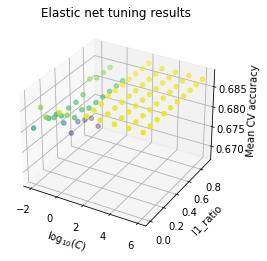

In [320]:
results = en_grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlabel("Mean CV accuracy")
ax.set_xlabel("$\log_{10}(C)$")
ax.set_ylabel("l1_ratio")
ax.set_title("Elastic net tuning results")
C_values = [param['en__C'] for param in params]
l1_ratio_values = [param['en__l1_ratio'] for param in params]
ax.scatter3D(np.log10(C_values), l1_ratio_values, mean_test_scores, c=mean_test_scores)
plt.show()

The model appears to converge around 68.5% accuracy once C is tuned high enough (once the penalty coefficient is lowered enough).

To get an idea of the variable importance, we can get the coefficients of the best model and plot their absolute values. The 10 coefficients with the greatest magnitude are plotted below:

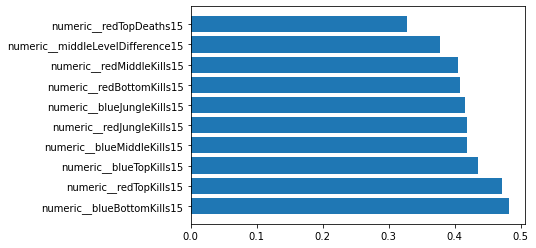

In [385]:
best_en_estimator = en_grid_search.best_estimator_
best_en_model = best_estimator.named_steps['en']
coefs = best_en_model.coef_[0]
feature_names = best_en_estimator.steps[0][1].get_feature_names_out()
feature_importance = list(zip(featurenames, np.abs(coefs)))
feature_importance = sorted(featureimportance, key=lambda x: -abs(x[1]))
most_important = feature_importance[:10]

plt.barh([feature[0] for feature in most_important], [feature[1] for feature in most_important])
plt.show()

The amount of kills the blue team botlaner happens to be the most significant predictor, but as we can see, kills on all the roles except for support (utility) appear to be highly significant.

The logistic regression model will output a probability of an event occurring --- in this case, the probability might be for the event of the blue team winning. Generally, if the probability is predicted to be over 50%, then the outcome is assigned to the event occurring. This threshold can be modified, and a model might have a better prediction accuracy on a particular sample of observations with a threshold other than 50%.

The ROC curve represents the true positive rates and false positive rates on a large range of prediction thresholds. In the event that a threshold where the model can perfectly classify the dataset exists, the curve will touch the top left corner, and the area under the curve (AUC) will be 1, but such a case usually does not happen, and is indicative of overfitting. Generally, however, a higher ROC AUC indicates a model that performs better, since it means that there exist prediction thresholds that have high true positive rate.

ROC AUC: 0.7756382281230152


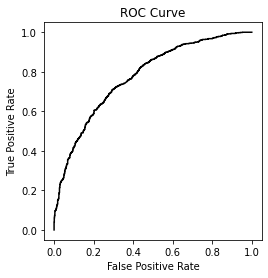

In [305]:
y_train_prob = best_en_estimator.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_train_prob, pos_label="Red")
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
plt.plot(fpr, tpr, color='black')
plt.gca().set_aspect('equal')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Support Vector Machine

Since the outcome of our classification problem is binary, a support vector machine is a potentially powerful predictive model. Support vector machines draw a decision boundary through the predictor space that aims to divide the outcome classes as cleanly as possible. This boundary can be linear or nonlinear, the latter of which is usually a more common and practical case. The determining factors for a winning game state are complex, so it is possible that a nonlinear decision boundary can adequately divide our predictor space.

In [313]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor), # same preprocessing steps
    ('svc', SVC(kernel='rbf')) # SVM with radial kernel
])

svc_param_grid = {
    'svc__C': [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5],
    'svc__gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2]
}

# Using same folds for cross-validation as before

svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=cv, scoring='accuracy', verbose=1)
svc_grid_search.fit(X_train, y_train)

print("Best parameters:", svc_grid_search.best_params_)
print("Best accuracy estimate:", svc_grid_search.best_score_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best parameters: {'svc__C': 100000.0, 'svc__gamma': 1e-06}
Best accuracy estimate: 0.6836973798902732


At 68.37%, the estimated accuracy of the SVM falls between that of the KNN and elastic net models. A very small value for gamma was favored, suggesting that the decision boundary is very smooth and generalistic. On the other hand, C was tuned very high, suggesting a small amount of regularization that preserves the magnitudes of a large number of features. I would have included even more extreme values for gamma and C in my tuning grid, but they seemed to be extremely slow to fit.

Visualizing the (log) values of gamma and C with respect to the mean cross-validation accuracy:

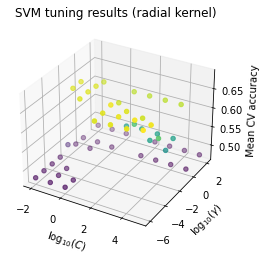

In [324]:
results = svc_grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlabel("Mean CV accuracy")
ax.set_xlabel("$\log_{10}(C)$")
ax.set_ylabel("$\log_{10}(\gamma)$")
ax.set_title("SVM tuning results (radial kernel)")
C_values = [param['svc__C'] for param in params]
gamma_values = [param['svc__gamma'] for param in params]
ax.scatter3D(np.log10(C_values), np.log10(gamma_values), mean_test_scores, c=mean_test_scores)
plt.show()

Visualizing the decision boundary is not feasible since there are far too many predictors.

### Random Forest

A random forest is an ensemble of decision trees --- flowchart based models that will split based on a decision, usually if a variable is less than or greater than a certain amount (or equal to a particular value if it is categorical) until there are too few samples left in a node to split further. The random forest fits a large number of decision trees on "bootstrapped" samples of the data, which are obtained by sampling the dataset with replacement. To make the trees decorrelated, the possible predictors to make a decision on are randomly sampled at each split.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])

rf_param_grid = {
    'rf__n_estimators': [100, 500, 1000, 2000, 3000, 4000, 5000],
    'rf__min_samples_split': [2, 5, 10, 20, 50],
    'rf__max_features': ['sqrt', 'log2'] # try sqrt(p) sampled predictors and log2(p) sampled predictors per split
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=cv, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

print("Best parameters:", rf_grid_search.best_params_)
print("Best accuracy estimate:", rf_grid_search.best_score_)

Surprisingly, the random forest performed the worst out of all the models, with an estimated test accuracy of 67.57% (I cleared the output to remove clutter from the final HTML, so pretend like it's there). Perhaps this is due to the large number of predictors, or I have simply not chosen a high enough value for n_estimators.

We can visualize how the estimation of test accuracy changes with respect to different values of the hyperparameters by averaging the cross-validation accuracy score for each value of the parameters:

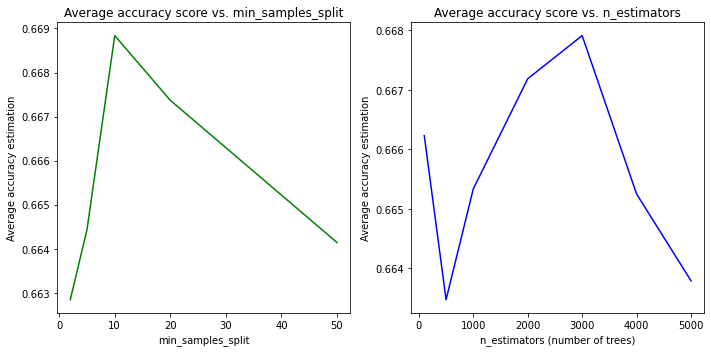

In [415]:
from itertools import groupby

rf_results = rf_grid_search.cv_results_
rf_best_estimator = rf_grid_search.best_estimator_
params = rf_results['params']
mean_test_scores = results['mean_test_score']
params_scores = list(zip(params, mean_test_scores))

min_samples_split_scores = [(p[0]['rf__min_samples_split'], p[1]) for p in params_scores]
min_samples_split_scores = sorted(min_samples_split_scores, key=lambda x: x[0])

# average accuracy score for each value of min_samples_split
min_samples_split_avg_scores = [(key, np.mean([g[1] for g in group])) for key, group in groupby(min_samples_split_scores, lambda x: x[0])]

n_estimators_scores = [(p[0]['rf__n_estimators'], p[1]) for p in params_scores]
n_estimators_scores = sorted(n_estimators_scores, key=lambda x: x[0])

# average accuracy score for each value of n_estimators
n_estimators_avg_scores = [(key, np.mean([g[1] for g in group])) for key, group in groupby(n_estimators_scores, lambda x: x[0])]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot([s[0] for s in min_samples_split_avg_scores], [s[1] for s in min_samples_split_avg_scores], color='green')
axes[1].plot([s[0] for s in n_estimators_avg_scores], [s[1] for s in n_estimators_avg_scores], color='blue')

axes[0].set_title("Average accuracy score vs. min_samples_split")
axes[0].set_xlabel("min_samples_split")
axes[0].set_ylabel("Average accuracy estimation")

axes[1].set_title("Average accuracy score vs. n_estimators")
axes[1].set_xlabel("n_estimators (number of trees)")
axes[1].set_ylabel("Average accuracy estimation")

plt.tight_layout()
plt.show()

The verticality of the plots may suggest that changing the values of the hyperparameters causes drastic changes, but both plots span less than 0.5% accuracy on the y-axis. Both the minimum number of observations needed to split and the number of trees peaked with a value near the middle of the grid.

## Best Models

The two models that had the highest estimation of test accuracy via K-fold cross validation were the elastic net logistic regression model and the support vector machine. We will evaluate their performance on the test set:

### Elastic Net

Using the previously selected best model from the elastic net logistic regression tuning grid:

In [437]:
from sklearn.metrics import accuracy_score

en_y_test_pred = best_en_estimator.predict(X_test)
print("Elastic net model test set accuracy:", accuracy_score(y_true=y_test, y_pred=en_y_test_pred))

Elastic net model test set accuracy: 0.7186234817813765


The test accuracy, 71.9%, surpassed the estimation given by cross-validation. This is not unexpected, since K-fold cross validation tends to give a slightly pessimistic estimate of the test error.

ROC AUC and ROC curve plot:

ROC AUC: 0.7724232887490166


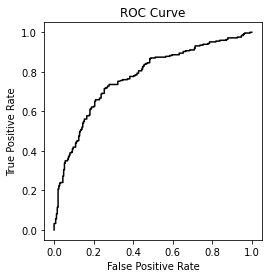

In [439]:
en_y_test_prob = best_en_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, en_y_test_prob, pos_label="Red")
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
plt.plot(fpr, tpr, color='black')
plt.gca().set_aspect('equal')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

To visualize the performance of the classifier better, we can show the confusion matrix, which can reveal if one label is mispredicted more than the other:

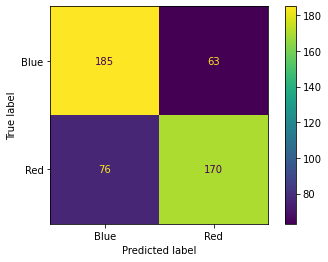

In [444]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(best_en_estimator, X_test, y_test)

From the confusion matrix, we can see that a larger proportion of games where the red team won are mispredicted than games where the blue team won.

### SVM

Using the previously selected best model from the SVM tuning grid:

In [441]:
svc_y_test_pred = best_svc_estimator.predict(X_test)
print("SVM test set accuracy:", accuracy_score(y_true=y_test, y_pred=svc_y_test_pred))

SVM test set accuracy: 0.708502024291498


Similar to the elastic net model, the actual test accuracy, 70.9% of the SVM model also surpassed the value estimated via cross-validation.

Confusion matrix:

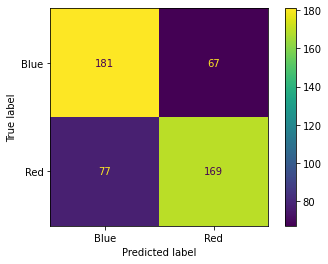

In [446]:
disp = ConfusionMatrixDisplay.from_estimator(best_svc_estimator, X_test, y_test)

The SVM model also tends to mispredict more on games where the red team won.

## Conclusion

This analysis proves that it is possible to to predict the outcome of a game of League of Legends based on the game state at 15 minutes with around a 70% accuracy. The elastic net logistic regression model with a L1 ratio of 0.3 and inverse penalty coefficient of 100 was the best performing model on both the cross-validated training set and the testing set. The support vector machine with the lowest regularization tested and the lowest flexibility tested was the second best performing model on both the training and testing set. Both models used the same predictor space, which included the first blood team, scoreline (kills, deaths, assists) of each player, and the differences between the numbers of each type of epic monster slain by each team.

In hindsight, I wish that I had recorded more information about the game when I was sourcing my dataset. For example, the creep score (number of minions and monsters killed) of each player at 15 minutes would have been extremely useful to be able to better estimate the gold difference between the teams, and the number of turrets destroyed at 15 minutes would have also given a lot of information about the progress of the game. I also considered using PCA to combine each player's kills, deaths, and assists into a single metric that represented their player vs. player performance, which might have improved the performance of the KNN model in particular. I would have also liked to include information about the players' ranks, since the average skill level of the players should significantly determine their ability to capitalize on advantages and push towards victory.

Overall, I am satisfied with the results of these models. 70% is a respectable accuracy for a predictive model, especially for a problem as volatile as the game of League of Legends. At the same time, I am relieved that the accuracy was not higher, since it proves that games are not always determined as early on as 15 minutes, and that players should not give up so easily as they always have a chance to make a comeback if they are behind.